In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib

In [2]:
inp = u"""job,start_date,end_date
Landestheater Detmold,2000-01-01,2001-06-30
FH Coburg, 2001-09-01, 2005-08-31
Harman Becker,2005-09-01,2009-08-31
"""

dtypes = {'job': 'str', 'start_date': 'str', 'end_date': 'str'}
parse_dates = ['start_date', 'end_date']
cv = pd.read_csv(io.StringIO(inp), dtype=dtypes, parse_dates=parse_dates)
cv.dtypes


job                   object
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

In [3]:
cv

,job,start_date,end_date
0,Landestheater Detmold,2000-01-01,2001-06-30
1,FH Coburg,2001-09-01,2005-08-31
2,Harman Becker,2005-09-01,2009-08-31


In [3]:
cv["start_date"] = matplotlib.dates.date2num(cv["start_date"])
cv["end_date"] = matplotlib.dates.date2num(cv["end_date"])
cv

,job,start_date,end_date
0,Landestheater Detmold,730120.0,730666.0
1,FH Coburg,730729.0,732189.0
2,Harman Becker,732190.0,733650.0


In [5]:
cv["duration"] = cv.end_date - cv.start_date
cv

,job,start_date,end_date,duration
0,Landestheater Detmold,730120.0,730666.0,546.0
1,FH Coburg,730729.0,732189.0,1460.0
2,Harman Becker,732190.0,733650.0,1460.0


In [6]:
for index, row in cv.iterrows():
    print(row['job'], row['start_date'], row['duration'])

Landestheater Detmold 730120.0 546.0
FH Coburg 730729.0 1460.0
Harman Becker 732190.0 1460.0


Landestheater Detmold 730120.0 546.0
FH Coburg 730729.0 1460.0
Harman Becker 732190.0 1460.0
['Landestheater Detmold', 'FH Coburg', 'Harman Becker']


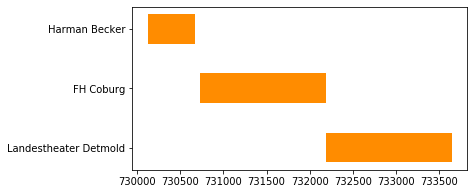

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))

labels=[]
for index, row in cv.iterrows():
    print(row['job'], row['start_date'], row['duration'])
    ax.broken_barh([(row["start_date"], row["duration"])], (0.75 + index, 0.5), facecolors=['darkorange', 'red'])
    labels.append(row['job'])
    
plt.yticks([x for x in range(1, len(labels)+1)], labels[::-1])
ax.invert_yaxis()
plt.show()
print(labels)